In [47]:
#### import required libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import  Adam
     

In [4]:
#### loading data
data = pd.read_csv('C:/Users/arifa/Downloads/Assignment/Assignment/Project  - 12 Neural Network (2)/forestfires.csv')

In [5]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
#### checking the null values in the data.
#### no missing values in the data set.
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

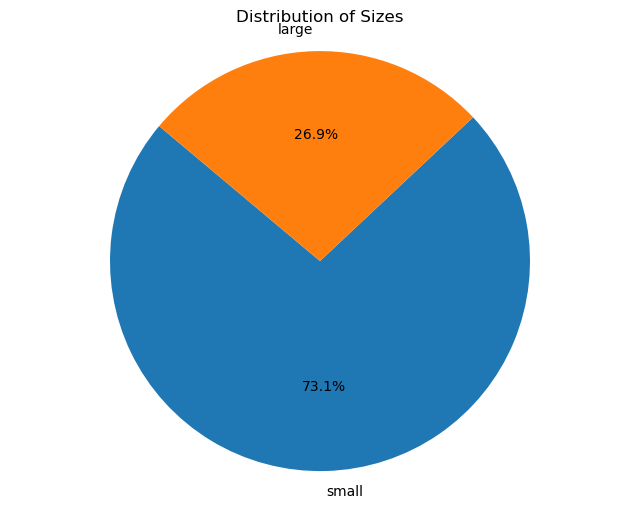

In [7]:
####EDA
#### ploting target variable distribution.
category_counts = data['size_category'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sizes')
plt.axis('equal')
plt.show()

In [8]:
category_counts

size_category
small    378
large    139
Name: count, dtype: int64

In [9]:
#### month feature with target variable.
month_df = data.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)


,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


Text(0.5, 1.0, 'Num of fires in each month')

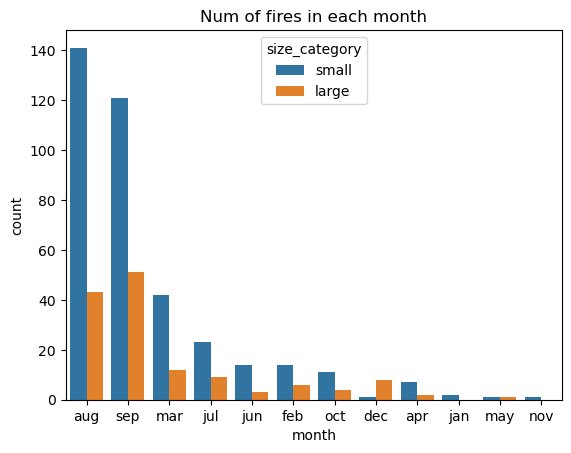

In [10]:
#### Aug month has seen highest number of small fires.
#### Whereas sep month has seen highest num of large fires.
#### Least num of fires occured in month of nov.

sns.barplot(x='month', y = 'count', hue='size_category', data=month_df)
plt.title("Num of fires in each month")

In [11]:
#### day feature with target variable.
day_df = data.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


Text(0.5, 1.0, 'Num of fires on each day')

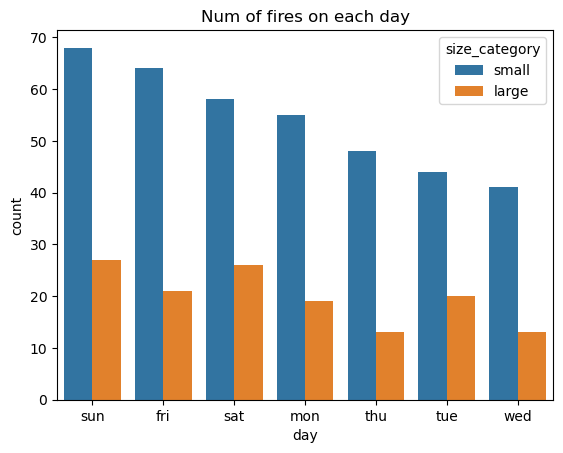

In [12]:
#### Highest num of small as well as large fires have occured on a Sunday.
#### Lowest num of small fires have occured on a Wednesday.
#### Lowest num of large fires have occured on a Wednesday and Thursday.
sns.barplot(x='day', y = 'count', hue='size_category', data=day_df)
plt.title("Num of fires on each day")

In [13]:
#### target variable have categorical values.
#### using labelencoding to convert in "small=1" and "large=0".
labelencoder = LabelEncoder()
data.iloc[:, -1] = labelencoder.fit_transform(data.iloc[:,-1])
data['size_category']  

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: object

In [14]:
#### rain feature with target variable.
rain_df = data.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

,size_category,rain,count
2,1,0.0,371
0,0,0.0,138
3,1,0.2,2
5,1,0.8,2
1,0,6.4,1
4,1,0.4,1
6,1,1.0,1
7,1,1.4,1


AttributeError: 'numpy.int64' object has no attribute 'startswith'

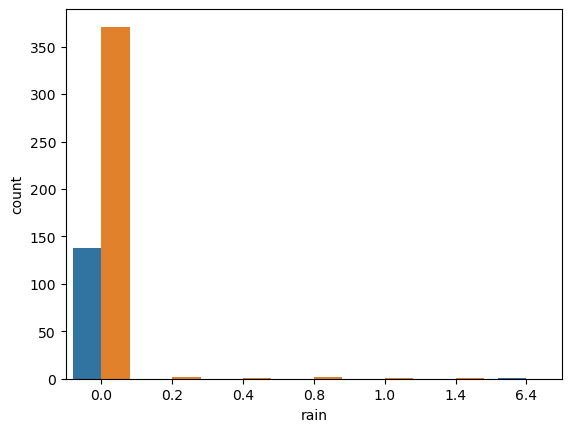

In [15]:
####Highest rainfall a forest has was of 6.4 and it comes under a large forest fire catogory.
sns.barplot(x='rain', y='count', hue='size_category', data=rain_df)
plt.title("Rainfall level in diff category of forest")

In [19]:
#### for the correlation taking numerical features.
####Heatmap
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [20]:
#to get correlation of target variable with numerical columns
data_1 = data.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
data_1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [22]:
print(data_1.dtypes)

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
size_category     object
dtype: object


In [23]:
print(data_1['size_category'].value_counts())

size_category
1    378
0    139
Name: count, dtype: int64


In [24]:
data_1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [25]:
data_1['size_category'].unique()

array([1, 0], dtype=object)

In [26]:
label_encoder = LabelEncoder()
data_1['size_category_encoded'] = label_encoder.fit_transform(data_1['size_category'])
print(data_1['size_category_encoded'].unique())
print(data_1['size_category_encoded'].dtype)

[1 0]
int32


In [27]:
print(data_1.dtypes)

FFMC                     float64
DMC                      float64
DC                       float64
ISI                      float64
temp                     float64
RH                         int64
wind                     float64
rain                     float64
area                     float64
size_category             object
size_category_encoded      int32
dtype: object


In [28]:
data_1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,size_category_encoded
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1,1


In [29]:
data_1 = data_1.drop('size_category', axis=1)

In [30]:
data_1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category_encoded
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [31]:
print(data_1.dtypes)

FFMC                     float64
DMC                      float64
DC                       float64
ISI                      float64
temp                     float64
RH                         int64
wind                     float64
rain                     float64
area                     float64
size_category_encoded      int32
dtype: object


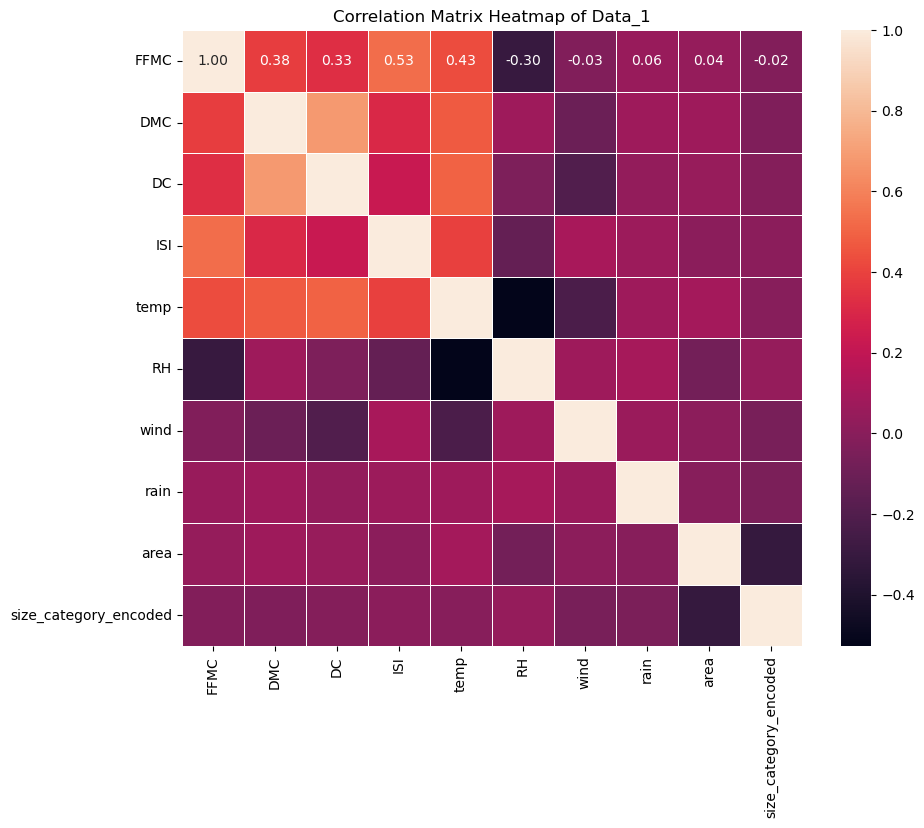

In [32]:
correlation_matrix = data_1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Data_1')
plt.show()

C:\Users\arifa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arifa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arifa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arifa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

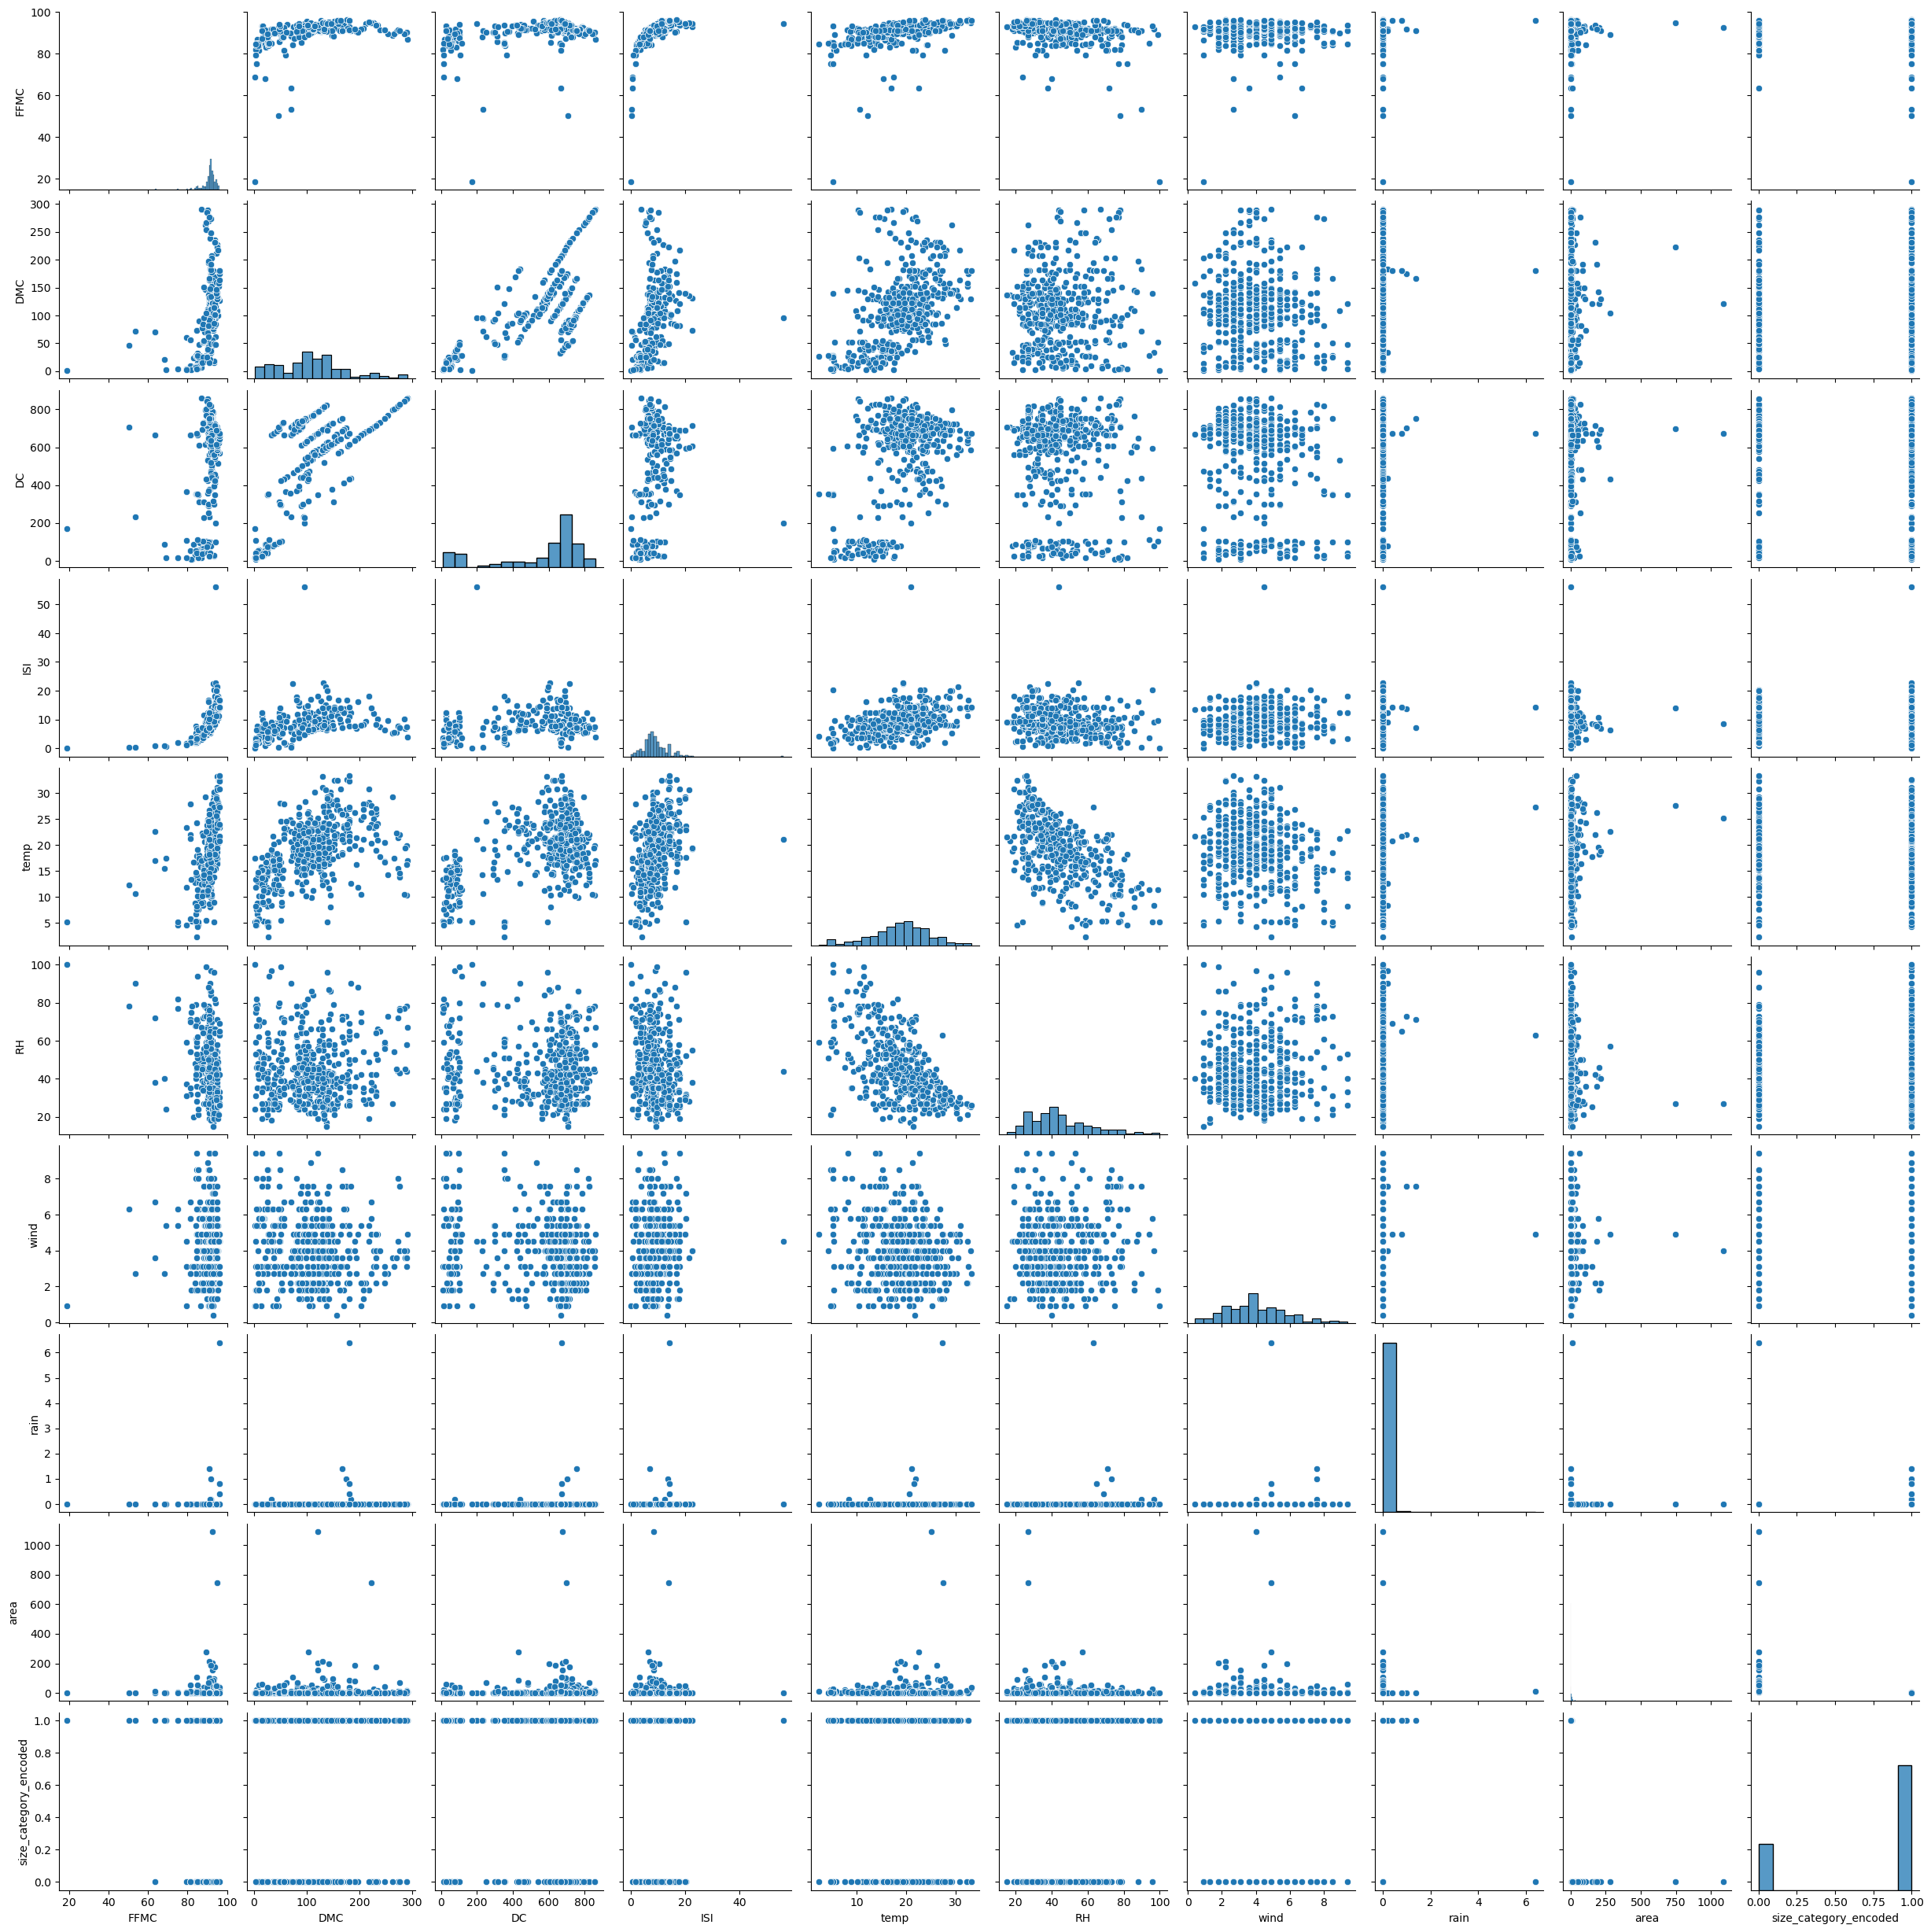

In [33]:
####We can get insights from last row of the plots for our prediction model.
sns.pairplot(data_1)

In [36]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
data.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)

In [38]:
label_encoder = LabelEncoder()
data['size_category_encoded'] = label_encoder.fit_transform(data['size_category'])
print(data['size_category_encoded'].unique())
print(data['size_category_encoded'].dtype)

[1 0]
int32


In [39]:
data.drop(['size_category'], axis=1, inplace=True)

In [40]:
#### Splitting data into target variable and independent variables.
x = data.drop('size_category_encoded', axis=1)
y = data['size_category_encoded']

In [41]:
### scaling to standerd scalar
std = StandardScaler()
x_std=pd.DataFrame(std.fit_transform(x), columns=x.columns) 


In [42]:
x_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,2.254407,...,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,-0.443576,...,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,-0.443576,...,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,2.254407,...,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,-0.443576,...,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)

In [44]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((387, 26), (130, 26), (387,), (130,))

In [51]:
#### Defining the model
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 26,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 16,kernel_initializer='normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

#### Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

#### Fitting the model

model.fit(x_train,y_train)

# Predicting using training data.

y_predict = model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test,y_predict))
     






    

C:\Users\arifa\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:367: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Test Accuracy: 0.9461538461538461


C:\Users\arifa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\arifa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2458: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [59]:
conf_matrix=confusion_matrix(y_test, y_predict)
print(conf_matrix)

[[ 23   6]
 [  1 100]]


In [56]:
y_hat = model.predict(x_train)
print("Train Accuracy:", accuracy_score(y_train, y_hat))

Train Accuracy: 0.9922480620155039


C:\Users\arifa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [58]:
conf_matrix=confusion_matrix(y_train, y_hat)
print(conf_matrix)

[[109   1]
 [  2 275]]


In [ ]:
#### "The model attained an impressive training accuracy of 99.22% and maintained a commendable test accuracy of 94.62%,
#### showcasing its robust performance across both training and testing datasets."